In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from matplotlib.dates import date2num
import matplotlib.dates
import numpy as np
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean.cm as cmo
import os
from collections import OrderedDict
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
from scipy.optimize import curve_fit

/Users/kthyng/miniconda3/envs/cart/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
land_10m = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor=cartopy.feature.COLORS['land'])
pc = cartopy.crs.PlateCarree()
merc = cartopy.crs.Mercator(central_longitude=-85.0)

plots = {'Water Level [m]': {'color': 'r', 'marker': 'o', 'ms': 10, 'alpha': 0.5}, 
         'WaterT [deg C]': {'color': 'b', 'marker': '.', 'ms': 10, 'alpha': 0.5}, 
         'Depth [m]': {'color': 'r', 'marker': 'o', 'ms': 10, 'alpha': 0.5},  
         'East [m/s]': {'color': 'g', 'marker': '>', 'ms': 10, 'alpha': 0.25}, 
         'North [m/s]': {'color': 'g', 'marker': '>', 'ms': 10, 'alpha': 0.25}, 
         'Salinity': {'color': 'k', 'marker': '*', 'ms': 10, 'alpha': 0.5}, 
         'Along [cm/s]': {'color': 'darkcyan', 'marker': '^', 'ms': 10, 'alpha': 0.5},
         'Across [cm/s]': {'color': 'darkcyan', 'marker': '^', 'ms': 10, 'alpha': 0.5},
         'Flow rate [m^3/s]': {'color': 'orange', 'marker':'s', 'ms': 10, 'alpha': 1},
         'Rain [cm]': {'color': 'purple', 'marker':'x', 'ms': 10, 'alpha': 1},
        }

base = 'drive_data/'

In [3]:
# read in buoy info
bys = pd.read_csv(base + 'buoys.csv', index_col=0).to_dict('index')

buoys = {'BOLI': {'ll': ([-94.783, 29.342]), 'color': '#689F38', 'vars': ['WaterT [deg C]', 'Depth [m]', 'Salinity']},
         'MIDG': {'ll': ([-94.875, 29.508]),  'color': '#FBC02D', 'vars': ['WaterT [deg C]', 'Depth [m]', 'Salinity']},
         'FISH': {'ll': ([-94.854, 29.670]),  'color': '#F57C00', 'vars': ['WaterT [deg C]', 'Depth [m]', 'Salinity']},
         'TRIN': {'ll': ([-94.746, 29.661]),  'color': '#FFA000', 'vars': ['WaterT [deg C]', 'Depth [m]', 'Salinity']},
         'OLDR': {'ll': ([-94.783, 29.833]), 'color': '#D32F2F', 'vars': ['WaterT [deg C]', 'Depth [m]', 'Salinity']},
         '08078000': {'ll': ([-95.32283, 29.3713056]), 'color': 'r', 'vars': ['Flow rate [m^3/s]']},
         '08077600': {'ll': ([-95.1783, 29.5172]), 'color': 'r', 'vars': ['Flow rate [m^3/s]']},
         '08074500': {'ll': ([-95.39694, 29.775]), 'color': 'r', 'vars': ['Flow rate [m^3/s]']},
         '08068500': {'ll': ([-95.4361, 30.110278]), 'color': 'r', 'vars': ['Flow rate [m^3/s]']},
         '08068090': {'ll': ([-95.3382, 30.141167]), 'color': 'r', 'vars': ['Flow rate [m^3/s]']},
         '08070500': {'ll': ([-95.302, 30.2594]), 'color': 'r', 'vars': ['Flow rate [m^3/s]']},
         '08071000': {'ll': ([-95.168056, 30.23250]), 'color': 'r', 'vars': ['Flow rate [m^3/s]']},
         '08070200': {'ll': ([-95.124167, 30.145278]), 'color': 'r', 'vars': ['Flow rate [m^3/s]']},
         '08071280': {'ll': ([-95.05972, 30.1094]), 'color': 'r', 'vars': ['Flow rate [m^3/s]']},
         '08067252': {'ll': ([-94.731, 29.812]), 'color': 'r', 'vars': ['Flow rate [m^3/s]']},
         '08067000': {'ll': ([-94.818056, 30.0575]), 'color': 'r', 'vars': ['Rain [cm]']},
         '08077650': {'ll': ([-94.92, 29.4472]), 'color': 'r', 'vars': ['Rain [cm]']},
         '08073600': {'ll': ([-95.55750, 29.76194]), 'color': 'r', 'vars': ['Rain [cm]']},
         '8771486': {'ll': ([bys['8771486']['lon'], bys['8771486']['lat']]),  'color': '#0097A7',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         '8770613': {'ll': ([bys['8770613']['lon'], bys['8770613']['lat']]),  'color': '#E64A19',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]',
                              'Salinity']},
         '8771013': {'ll': ([bys['8771013']['lon'], bys['8771013']['lat']]), 'color': '#AFB42B',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]',
                              'Salinity']},
         '8771341': {'ll': ([bys['8771341']['lon'], bys['8771341']['lat']]), 'color': '#388E3C',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]',
                             'AtmPr [MB]']},
         '8771450': {'ll': ([bys['8771450']['lon'], bys['8771450']['lat']]), 'color': '#00796B',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]',
                             'AtmPr [MB]']},
         'B': {'ll': ([bys['B']['lon'], bys['B']['lat']]), 'color': '#303F9F',
                     'vars': ['AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]', 'Salinity', 
                              'Along [cm/s]', 'Across [cm/s]']},
         'g06010': {'ll': ([bys['g06010']['lon'], bys['g06010']['lat']]), 'color': '#388E3C',
                     'vars': ['Along [cm/s]', 'Across [cm/s]', 'WaterT [deg C]']},
         '42035': {'ll': ([bys['42035']['lon'], bys['42035']['lat']]), 'color': '#5D4037',
                     'vars': ['AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         '8770808': {'ll': ([bys['8770808']['lon'], bys['8770808']['lat']]), 'color': '#512DA8',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         '8770777': {'ll': ([bys['8770777']['lon'], bys['8770777']['lat']]), 'color': '#C2185B',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         '8770822': {'ll': ([bys['8770822']['lon'], bys['8770822']['lat']]), 'color': '#455A64',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         '8770971': {'ll': ([bys['8770971']['lon'], bys['8770971']['lat']]), 'color': '#7B1FA2',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']},
         '8771972': {'ll': ([bys['8771972']['lon'], bys['8771972']['lat']]), 'color': '#0288D1',
                     'vars': ['Water Level [m]', 'AirT [deg C]', 'WaterT [deg C]', 'East [m/s]', 'North [m/s]']}
        }


buoys_ordered = ['8770777', '8770613', 'OLDR', 'FISH', 'TRIN', 'MIDG', '8771013', 'BOLI', 'g06010', '8771341',
                '8771450', '8771486', '8771972', '8770971', '8770808', 'B', '42035', '8770822']
# buoys down main bay
buoys_main = ['8770613', 'FISH', 'TRIN', 'MIDG', '8771013', 'BOLI', 'g06010', '8771341', '8771450']
# buoys used in analysis
buoys_used = ['MIDG', '8771013', 'g06010', 'BOLI', '8771486', '8771341', '8770613', '8771972']

In [4]:
# See make_data notebook. This reads in data from many sources, recalculates so that all data is hourly by taking 
# hourly averages, and shifts water levels to all be mean high water to match the bathymetry.
df = pd.read_csv(base + 'data.csv', parse_dates=True, index_col=0)

dstart = '2017-06-01'; dend = '2017-12-31'

In [5]:
saltcols = [col for col in df.columns if 'Salinity' in col]
saltcols = [col for col in saltcols if not 'OLDR' in col]
saltcols = [col for col in saltcols if not 'B:' in col]
saltcols

['FISH: Salinity',
 'MIDG: Salinity',
 'TRIN: Salinity',
 'BOLI: Salinity',
 '8770613: Salinity',
 '8771013: Salinity']

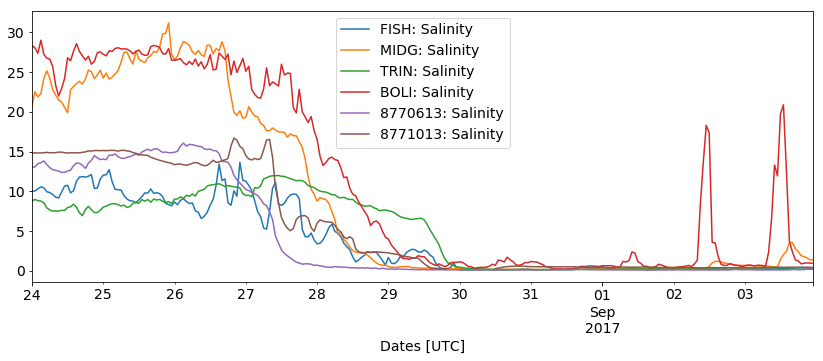

In [6]:
df[saltcols]['2017-8-24':'2017-9-3'].plot(figsize=(14,5), legend=True)

In [97]:
def func(t, A, tau):
    '''exponential function.'''

    return A*(1-np.exp(-t/tau))


In [212]:
# do curve fit of salinity in log space so that can use polyfit to fit
# a straight line

for col in saltcols:
    df[col + ' (log)'] = np.log(df[col])
    
# get some datetime numbers to use in calculation
df['idx'] = date2num(df.index.to_pydatetime())


# Flushing

In [154]:
times = {'FISH': {'start': '2017-8-27 00:00', 'stop': '2017-8-30 00:00'},
        'MIDG': {'start': '2017-8-26 16:00', 'stop': '2017-8-29 00:00'},
        'TRIN': {'start': '2017-8-27 12:00', 'stop': '2017-8-29 12:00'},
        'BOLI': {'start': '2017-8-27 16:00', 'stop': '2017-8-30 00:00'},
        '8770613': {'start': '2017-8-26 16:00', 'stop': '2017-8-29 00:00'},
        '8771013': {'start': '2017-8-27 8:00', 'stop': '2017-8-29 12:00'}}



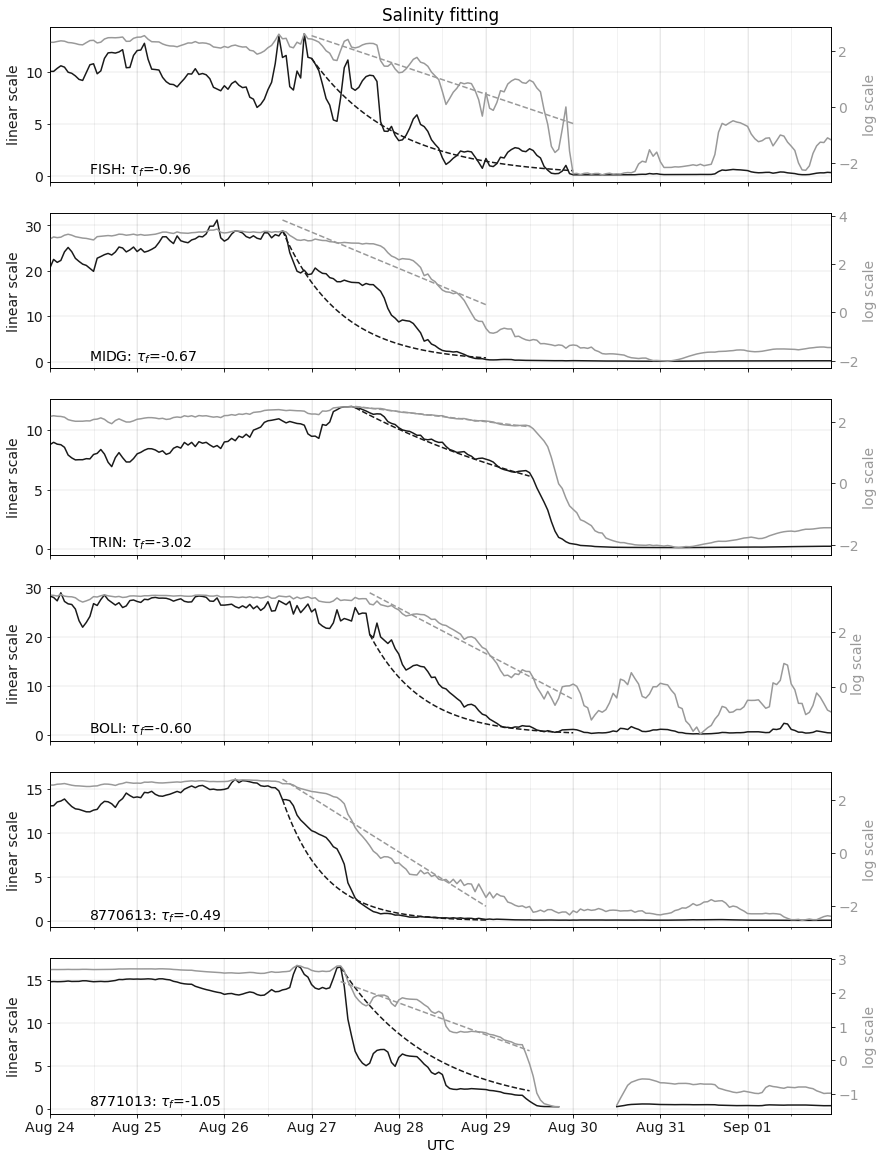

In [155]:
dst = '2017-8-24'; den = '2017-9-1'
fig, axes = plt.subplots(len(saltcols), 1, figsize=(14,20), sharex=True)

for col, ax in zip(saltcols, axes):
    
    # get fit
    name = col.split(':')[0]
    d1 = times[name]['start']; d2 = times[name]['stop']
    tnums = df['idx'][d1:d2] - df['idx'][d1]
    p = np.polyfit(tnums, df[col + ' (log)'][d1:d2], 1)
    tau = 1/p[0]
    S0 = df[col][d1]
    y = S0*np.exp(tnums/tau)
    
    # linear
    color = '0.1'
    ax.plot(df[dst:den].index, df[col][dst:den], color=color)  # plot data
    ax.plot(df[d1:d2].index, y, '--', color=color)  # plot fit
    ax.tick_params(labelcolor=color)
    ax.set_ylabel('linear scale', color=color)
    
    # log
    color = '0.6'
    ax2 = ax.twinx()
    ax2.plot(df[dst:den].index, df[col + ' (log)'][dst:den], color=color)  # plot log data
    ax2.plot(df[d1:d2].index, np.polyval(p, tnums), label='log space line fit', color=color, ls='--')  # plot log fit
    ax2.tick_params(labelcolor=color)
    ax2.set_ylabel('log scale', color=color)

    # write station name and tau
    ax.text(0.05, 0.05, name + r': $\tau_f$=%1.2f' % tau, transform=ax.transAxes)
    
    hours = mpl.dates.HourLocator(byhour=np.arange(0,24,12))
    ax.xaxis.set_minor_locator(hours)
    days = mpl.dates.HourLocator(byhour=np.arange(0,24,24))
    ax.xaxis.set_major_locator(days)

    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
    ax.grid(which='major', lw=1.5, color='k', alpha=0.05)
    ax.grid(which='minor', lw=1, color='k', alpha=0.05)

axes[0].set_title('Salinity fitting')
axes[-1].set_xlabel('UTC')
axes[-1].autoscale(enable=True, axis='x', tight=True)


# df[[col for col in df.columns if 'log' in col]]['2017-8-24':'2017-9-3'].plot(figsize=(14,15), legend=True, subplots=True);

0.956338639528


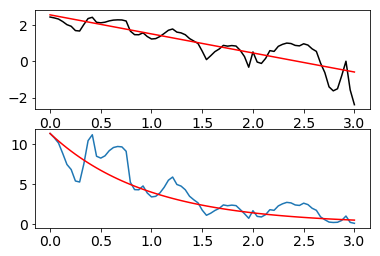

In [207]:
dst = '2017-8-27 00:00'; dend = '2017-8-30 00:00'
tnums = df['idx'][dst:dend] - df['idx'][dst]
p = np.polyfit(tnums, df[saltcols[0] + ' (log)'][dst:dend], 1)

fig, axes = plt.subplots(2, 1)
axes[0].plot(tnums, df[saltcols[0] + ' (log)'][dst:dend],'k', label='Salinity, ')
axes[0].plot(tnums, np.polyval(p, tnums), 'r', label='log space line fit')

tau = -1/p[0]
S0 = df[saltcols[0]][dst]
y = S0*np.exp(-tnums/tau)

axes[1].plot(tnums, df[saltcols[0]][dst:dend])
axes[1].plot(tnums, y, 'r')
print(tau)

Watersheds

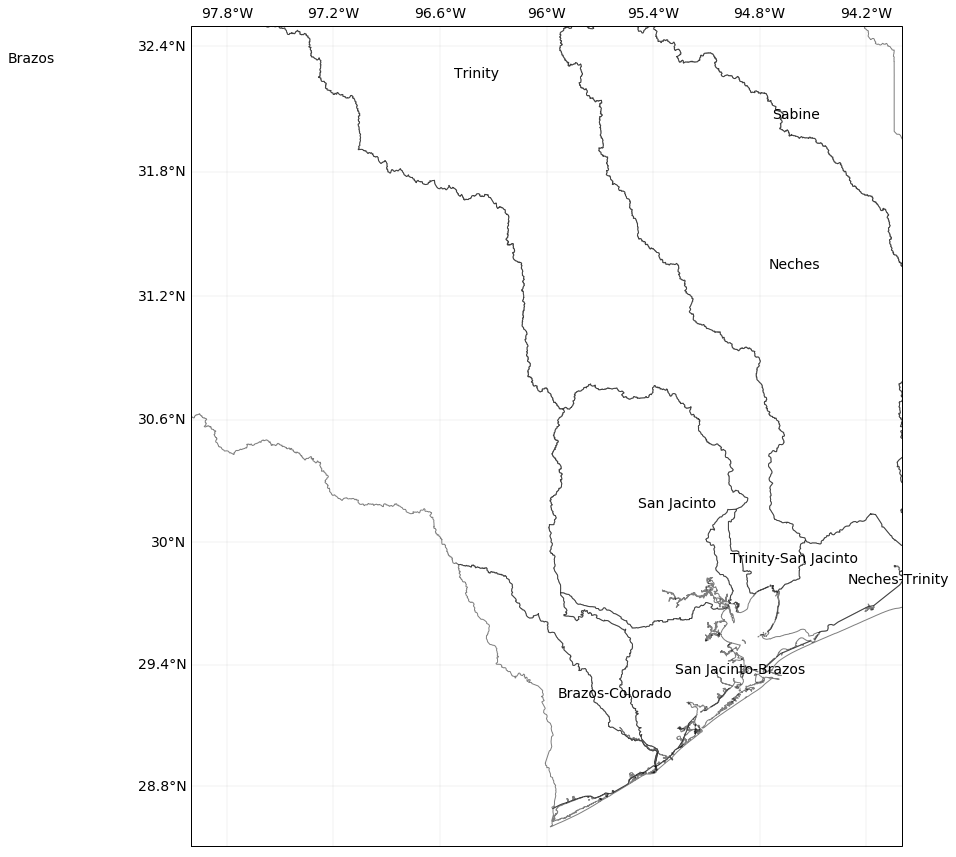

In [381]:
extent = [-98, -94.0, 28.5, 32.5]

fig = plt.figure(figsize=(14, 12))# (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
ax.set_extent(extent, pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
# ax.add_feature(land_10m, facecolor='0.8')
# ax.coastlines(resolution='10m')  # coastline resolution options are '110m', '50m', '10m'
# ax.set_facecolor('0.8')
# ax.pcolormesh(lon, lat, bathyo.mask, cmap=cmo.gray_r, vmin=0, vmax=3, transform=pc)
# mappable = ax.pcolormesh(lon, lat, bathyo, cmap=cmo.gray, transform=pc)
# ax.contour(lon, lat, bathyo.mask, 1, colors='k', linewidths=1, transform=pc)
# cb = fig.colorbar(mappable)
# cb.set_label('Depth [m]')

# for buoy in buoys:
#     Vars = ['Rain [cm]', 'Flow rate [m^3/s]']
#     for var in Vars:
#         if var in buoys[buoy]['vars']:
# #             if not df['2017-08-24':'2017-09-3'][buoy + ': ' + var].isnull().all():
#             ax.plot(*buoys[buoy]['ll'], **plots[var], transform=pc, label=var)
#             ax.text(*buoys[buoy]['ll'], buoy, transform=pc, fontsize=16, color=buoys[buoy]['color'])

# ax.add_geometries(cartopy.io.shapereader.Reader('drive_data/tceq_segments_2014_shp/TCEQ_SEGMENT_LINE_2014.shp').geometries(),
#                   pc, edgecolor='r', facecolor='none', alpha=0.1)
# ax.add_geometries(cartopy.io.shapereader.Reader('drive_data/tceq_segments_2014_shp/TCEQ_SEGMENT_POLY_2014.shp').geometries(),
#                   pc, edgecolor='r', facecolor='b', alpha=0.1)
# # ax.add_geometries(cartopy.io.shapereader.Reader('drive_data/Major_Rivers_dd83/MajorRivers_dd83.shp').geometries(),
# #                   pc, edgecolor='darkcyan', facecolor='none')
# # ax.add_geometries(cartopy.io.shapereader.Reader('drive_data/Major_River_Basins_Shapefile/TWDB_MRBs_2014.shp').geometries(),
# #                   pc, edgecolor='g', facecolor='b', alpha=0.1)
# # ax.add_geometries(cartopy.io.shapereader.Reader('drive_data/Existing_Reservoirs/TWDB_SWP2012_Major_Reservoirs.prj').geometries(),
# #                   pc, edgecolor='b', facecolor='none')


# # Add lakes to plot
# reader = cartopy.io.shapereader.Reader('drive_data/tceq_segments_2014_shp/TCEQ_SEGMENT_POLY_2014.shp')
# lakes = reader.records()
# for lake in lakes:
#     if ext.contains(lake.geometry.centroid) and "Bay" not in lake.attributes['BASIN_NAME'] \
#          and "Gulf" not in lake.attributes['BASIN_NAME'] and lake.attributes['SIZE_'] > 1000:
#         ax.add_geometries([lake.geometry], pc, facecolor='b', edgecolor='k', alpha=0.1)

# # Add rivers to plot
# reader = cartopy.io.shapereader.Reader('drive_data/tceq_segments_2014_shp/TCEQ_SEGMENT_LINE_2014.shp')
# rivers = reader.records()
# for river in rivers:
#     if ext.contains(river.geometry.centroid):
#         ax.add_geometries([river.geometry], pc, facecolor='none', edgecolor='b', alpha=0.5)

# Add river basins to plot
reader = cartopy.io.shapereader.Reader('drive_data/Major_River_Basins_Shapefile/TWDB_MRBs_2014.shp')
basins = reader.records()
# Read in the data from the file into the "states" generator which we can iterate over
for basin in basins:
    if ext.intersects(basin.geometry.convex_hull):
        ax.text(basin.geometry.centroid.x, basin.geometry.centroid.y, basin.attributes['basin_name'], transform=pc)
        ax.add_geometries([basin.geometry], pc, facecolor='none', edgecolor='k', alpha=0.5)

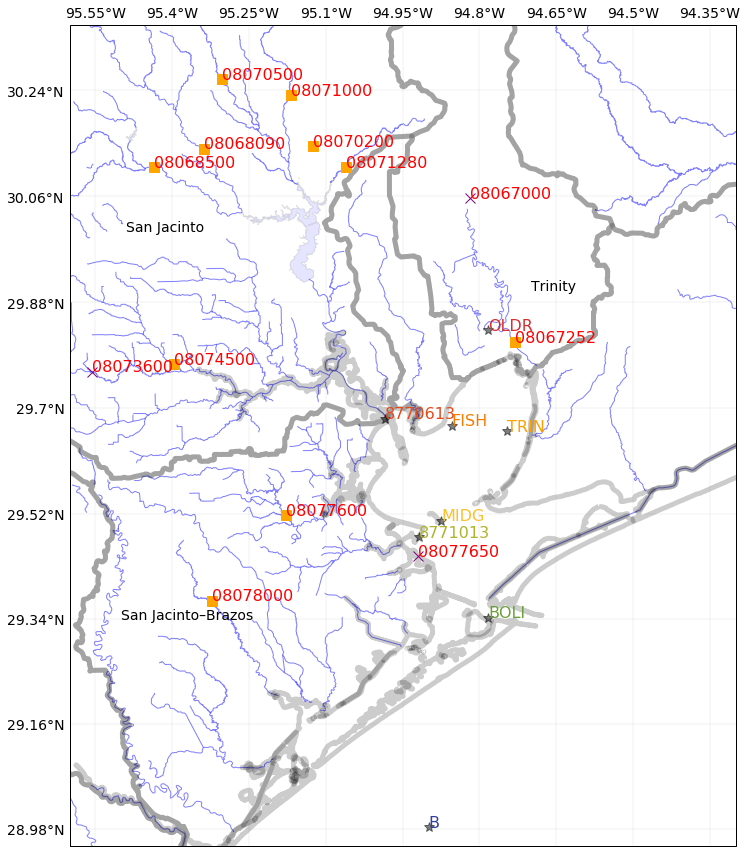

In [53]:
d = np.load('drive_data/bathy_galv_clean.npz')  # all of Galveston Bay
bathy = d['bathy']; dx = d['dx']; dy = d['dy']; lon = d['lon']; lat = d['lat']
bathyo = np.load('drive_data/bathy_every_fifth.npz')['bathy'][::-1,:][1:-1,1:-1]  # all
bathyo = np.ma.masked_where(bathyo>0, bathyo)

extent = [-95.6, -94.3, 28.95, 30.35]
import shapely
x1, x2, y1, y2 = extent
pts = np.array([[x1, y1], [x1, y2], [x2, y2], [x2, y1]])
ext = shapely.geometry.Polygon(pts)


fig = plt.figure(figsize=(14, 12))# (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
ax.set_extent(extent, pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
# ax.add_feature(land_10m, facecolor='0.8')
# ax.coastlines(resolution='10m')  # coastline resolution options are '110m', '50m', '10m'
# ax.set_facecolor('0.8')
# ax.pcolormesh(lon, lat, bathyo.mask, cmap=cmo.gray_r, vmin=0, vmax=3, transform=pc)
# mappable = ax.pcolormesh(lon, lat, bathyo, cmap=cmo.gray, transform=pc)
# ax.contour(lon, lat, bathyo.mask, 1, colors='k', linewidths=1, transform=pc)
# cb = fig.colorbar(mappable)
# cb.set_label('Depth [m]')

for buoy in buoys:
    Vars = ['Rain [cm]', 'Flow rate [m^3/s]', 'Salinity']
    for var in Vars:
        if var in buoys[buoy]['vars']:
#             if not df['2017-08-24':'2017-09-3'][buoy + ': ' + var].isnull().all():
            ax.plot(*buoys[buoy]['ll'], **plots[var], transform=pc, label=var)
            ax.text(*buoys[buoy]['ll'], buoy, transform=pc, fontsize=16, color=buoys[buoy]['color'])

# ax.add_geometries(cartopy.io.shapereader.Reader('drive_data/tceq_segments_2014_shp/TCEQ_SEGMENT_LINE_2014.shp').geometries(),
#                   pc, edgecolor='r', facecolor='none', alpha=0.1)
# ax.add_geometries(cartopy.io.shapereader.Reader('drive_data/tceq_segments_2014_shp/TCEQ_SEGMENT_POLY_2014.shp').geometries(),
#                   pc, edgecolor='r', facecolor='b', alpha=0.1)
# # ax.add_geometries(cartopy.io.shapereader.Reader('drive_data/Major_Rivers_dd83/MajorRivers_dd83.shp').geometries(),
# #                   pc, edgecolor='darkcyan', facecolor='none')
# # ax.add_geometries(cartopy.io.shapereader.Reader('drive_data/Major_River_Basins_Shapefile/TWDB_MRBs_2014.shp').geometries(),
# #                   pc, edgecolor='g', facecolor='b', alpha=0.1)
# # ax.add_geometries(cartopy.io.shapereader.Reader('drive_data/Existing_Reservoirs/TWDB_SWP2012_Major_Reservoirs.prj').geometries(),
# #                   pc, edgecolor='b', facecolor='none')


# Add lakes to plot
reader = cartopy.io.shapereader.Reader('drive_data/tceq_segments_2014_shp/TCEQ_SEGMENT_POLY_2014.shp')
lakes = reader.records()
for lake in lakes:
    if ext.contains(lake.geometry.centroid) and "Bay" not in lake.attributes['BASIN_NAME'] \
         and "Gulf" not in lake.attributes['BASIN_NAME']:
#          and "Gulf" not in lake.attributes['BASIN_NAME'] and lake.attributes['SIZE_'] > 1000:
        ax.add_geometries([lake.geometry], pc, facecolor='b', edgecolor='k', alpha=0.1)

# Add rivers to plot
reader = cartopy.io.shapereader.Reader('drive_data/tceq_segments_2014_shp/TCEQ_SEGMENT_LINE_2014.shp')
rivers = reader.records()
for river in rivers:
    if ext.contains(river.geometry.centroid):
        ax.add_geometries([river.geometry], pc, facecolor='none', edgecolor='b', alpha=0.5)

# Add river basins to plot
reader = cartopy.io.shapereader.Reader('drive_data/Major_River_Basins_Shapefile/TWDB_MRBs_2014.shp')
basins = reader.records()
for basin in basins:
    if ext.intersects(basin.geometry.convex_hull):
        ax.add_geometries([basin.geometry], pc, facecolor='none', edgecolor='k', linewidth=5, alpha=0.2)
# Add labels
ax.text(-95.49, 30.0, 'San Jacinto', transform=pc)
ax.text(-95.5, 29.34, 'San Jacinto–Brazos', transform=pc)
ax.text(-94.7, 29.9, 'Trinity', transform=pc)

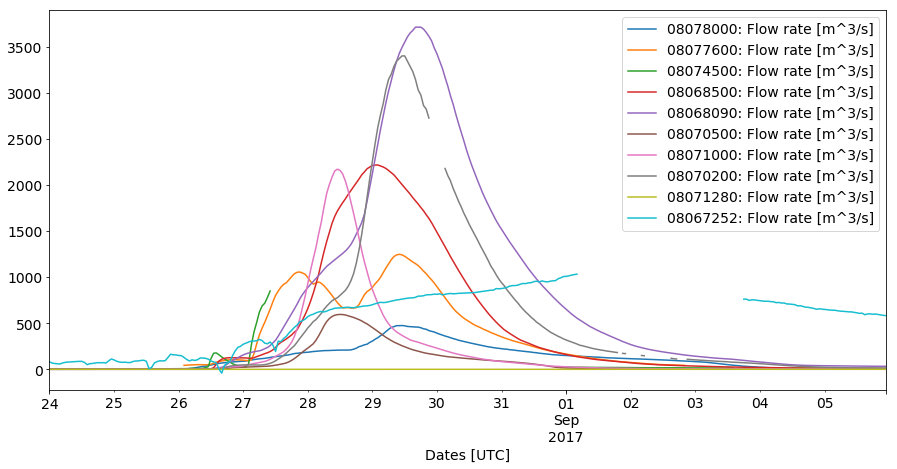

In [19]:
cs = ['08078000', '08077600', '08074500', '08068500', '08068090', '08070500', '08071000', '08070200', '08071280', '08067252']
cvs = [c + ': Flow rate [m^3/s]' for c in cs]
df[cvs]['2017-8-24':'2017-9-5'].plot(figsize=(15,7))

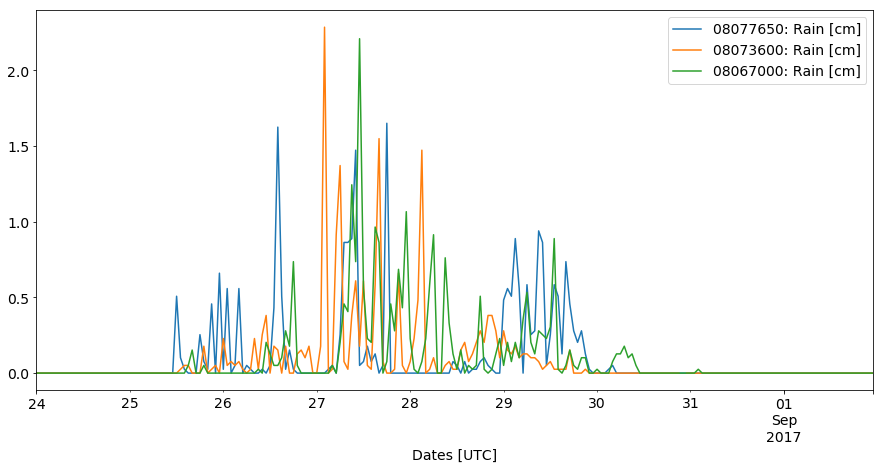

In [51]:
cs = ['08077650', '08073600', '08067000']
cvs = [c + ': Rain [cm]' for c in cs]
df[cvs]['2017-8-24':'2017-9-1'].plot(figsize=(15,7))

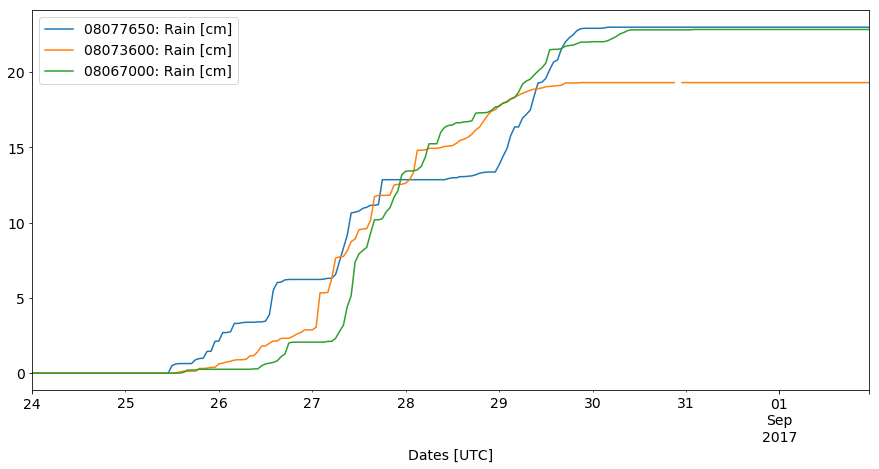

In [52]:
cs = ['08077650', '08073600', '08067000']
cvs = [c + ': Rain [cm]' for c in cs]
(df[cvs]['2017-8-24':'2017-9-1'].cumsum()).plot(figsize=(15,7))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11c2c8a20>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x121b043c8>], dtype=object)

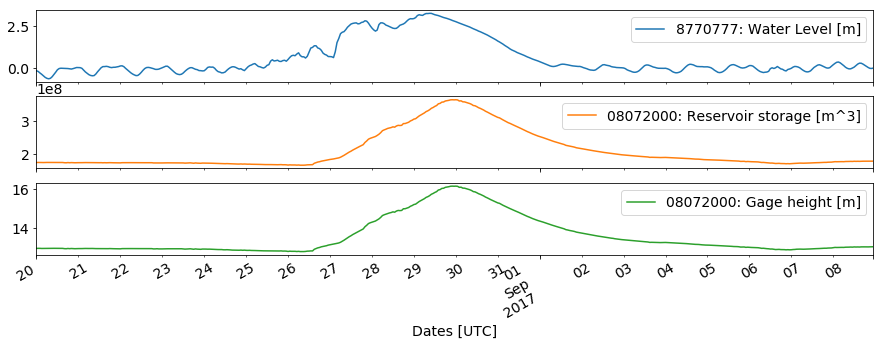

In [49]:
df[['8770777: Water Level [m]', '08072000: Reservoir storage [m^3]', '08072000: Gage height [m]']]['2017-8-20':'2017-9-8'].plot(figsize=(15,5), subplots=True)

**Should note when reservoirs were opened: Addicks and Barker should be visible in water level at 8770777 and Lake Houston maybe in the gageheight at the Lake.

In [47]:
url = 'https://nwis.waterdata.usgs.gov/usa/nwis/uv/?cb_00054=on&cb_00065=on&format=rdb&site_no=08072000&period=&begin_date=2017-06-01&end_date=2017-12-31'

df2 = pd.read_table(url, parse_dates=True, comment='#', header=1, index_col=0, usecols=[2,4,6], names=['Dates [UTC]', '08072000: Reservoir storage [m^3]', '08072000: Gage height [m]']).tz_localize('US/Central', ambiguous=True).tz_convert('UTC')
df2['08072000: Reservoir storage [m^3]'] *= 1233.48  # convert from acre-foot to m^3
df2['08072000: Gage height [m]'] *= 0.3048  # convert from feet to meters
df2 = df2.resample('1H', base=0).mean().tz_localize(None)


In [48]:
df['08072000: Reservoir storage [m^3]'] = df2['08072000: Reservoir storage [m^3]']
df['08072000: Gage height [m]'] = df2['08072000: Gage height [m]']

In [54]:
station = '08042558'  # by TRIN station
url = 'https://nwis.waterdata.usgs.gov/usa/nwis/uv/?cb_00060=on&cb_00065=on&format=rdb&site_no=' + station + '&period=&begin_date=' \
        + dstart + '&end_date=' + dend
river = pd.read_table(url, parse_dates=True, comment='#', header=1, usecols=[2,4], index_col=0,
                 names=['Dates [UTC]', station + ': Flow rate [m^3/s]'])[dstart:dend].tz_localize('US/Central', ambiguous=True).tz_convert('UTC')
river = river*0.3048**3  # to m^3/s
river = river.resample('1H', base=0).mean()


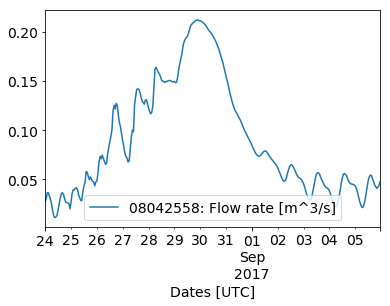

In [56]:
river['2017-8-24':'2017-9-5'].plot()

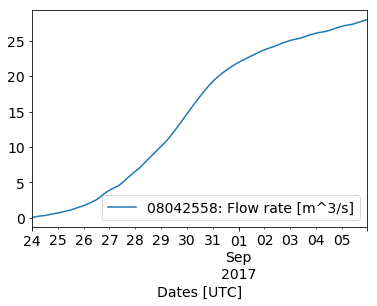

In [57]:
(river['2017-8-24':'2017-9-5'].cumsum()).plot()

In [58]:
# water level near 8771013 at 08077650
url = 'https://nwis.waterdata.usgs.gov/usa/nwis/uv/?cb_62619=on&cb_62619=on&format=rdb&site_no=08077650&period=&begin_date=2017-06-01&end_date=2017-12-31'
level = pd.read_table(url, parse_dates=True, comment='#', header=1, usecols=[2,4], index_col=0,
                 names=['Dates [UTC]', station + ': Water level [m]'])[dstart:dend].tz_localize('US/Central', ambiguous=True).tz_convert('UTC')
level *= 0.3048  # convert from feet to meters
level = level.resample('1H', base=0).mean()



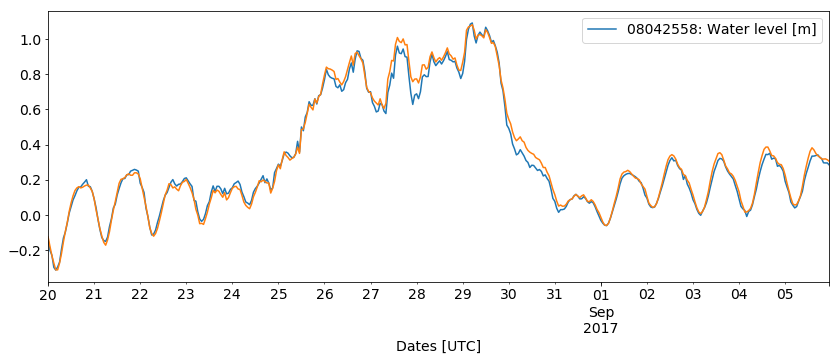

In [65]:
(level['2017-8-20':'2017-9-5']-0.3).plot()
df['8771013: Water Level [m]']['2017-8-20':'2017-9-5'].plot(figsize=(14,5))

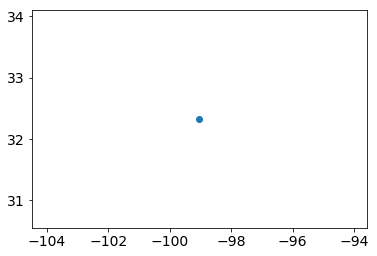

In [289]:
ADD STORM CENTER LOCATION TO MAP TOO?

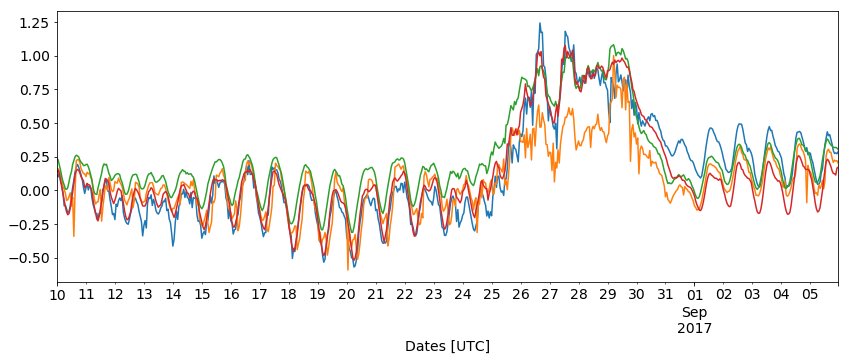

In [77]:
(df['FISH: Depth [m]']-2)['2017-8-10':'2017-9-5'].plot()
(df['MIDG: Depth [m]']-3)['2017-8-10':'2017-9-5'].plot(figsize=(14,5))
df['8771013: Water Level [m]']['2017-8-10':'2017-9-5'].plot(figsize=(14,5))
df['8770613: Water Level [m]']['2017-8-10':'2017-9-5'].plot(figsize=(14,5))

** Want to demonstrate spatial timing of rain water input for flushing time scales, though this may not be important for Antonietta's paper

** should move on to reintroduction timescales

# Reintroduction timescales

Use September 2nd as the start of this interval since that is when the rain has stopped pushing into the system as much.

In [109]:
def func1(t, A, tau):
    '''exponential function.'''

    return A*(np.exp(-t/tau))


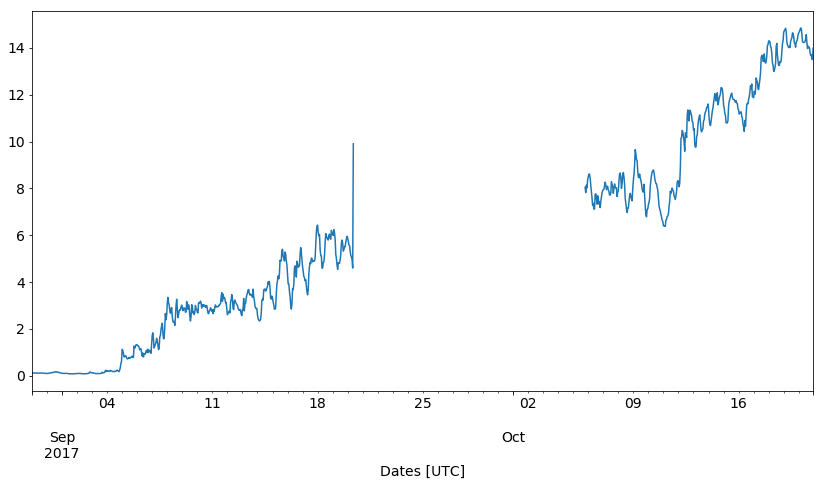

In [169]:
df[saltcols[-2]]['2017-8-30':'2017-10-20'].plot(figsize=(14,7), legend=False)

When is each station back to "normal" conditions?

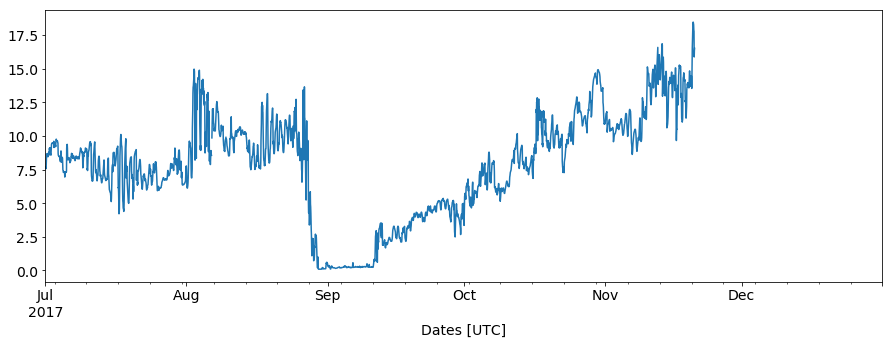

In [234]:
dst = '2017-7-1'; den = '2017-12-31'
df.loc[dst:dend, saltcols[0]].plot(figsize=(15,5))

In [465]:
times = {'FISH': {'starts': ['2017-9-13 12:00'], 'stops': ['2017-10-27 00:00']},
        'MIDG': {'starts': ['2017-9-5 00:00'], 'stops': ['2017-11-7 00:00']},
        'TRIN': {'starts': ['2017-9-23 00:00'], 'stops': ['2017-10-28 00:00']},
        'BOLI': {'starts': ['2017-9-7 00:00'], 'stops': ['2017-11-1 00:00']},
        '8770613': {'starts': ['2017-9-8 00:00'], 'stops': ['2017-10-17 00:00']},
        '8771013': {'starts': ['2017-9-12 00:00'], 'stops': ['2017-11-5 00:00']}}

# Ss = {'FISH': }

# times = {'FISH': {'starts': ['2017-9-14 00:00', '2017-9-28 00:00'], 'stops': ['2017-9-27 00:00', '2017-10-16 00:00']},
#         'MIDG': {'starts': ['2017-8-31 00:00', '2017-9-7 00:00'], 'stops': ['2017-9-6 00:00', '2017-9-17 00:00']},
#         'TRIN': {'starts': ['2017-9-17 12:00'], 'stops': ['2017-10-6 00:00']},
#         'BOLI': {'starts': ['2017-8-31 16:00', '2017-9-9 00:00'], 'stops': ['2017-9-8 00:00','2017-9-22 00:00']},
#         '8770613': {'starts': ['2017-9-1 16:00', '2017-9-8 00:00'], 'stops': ['2017-9-8 00:00','2017-9-20 00:00']},
#         '8771013': {'starts': ['2017-9-8 00:00'], 'stops': ['2017-9-22 00:00']}}

10.106138071342624
19.802091487342086
7.0942814103657525
25.475086877141045
10.679187119708992
14.693431489748663


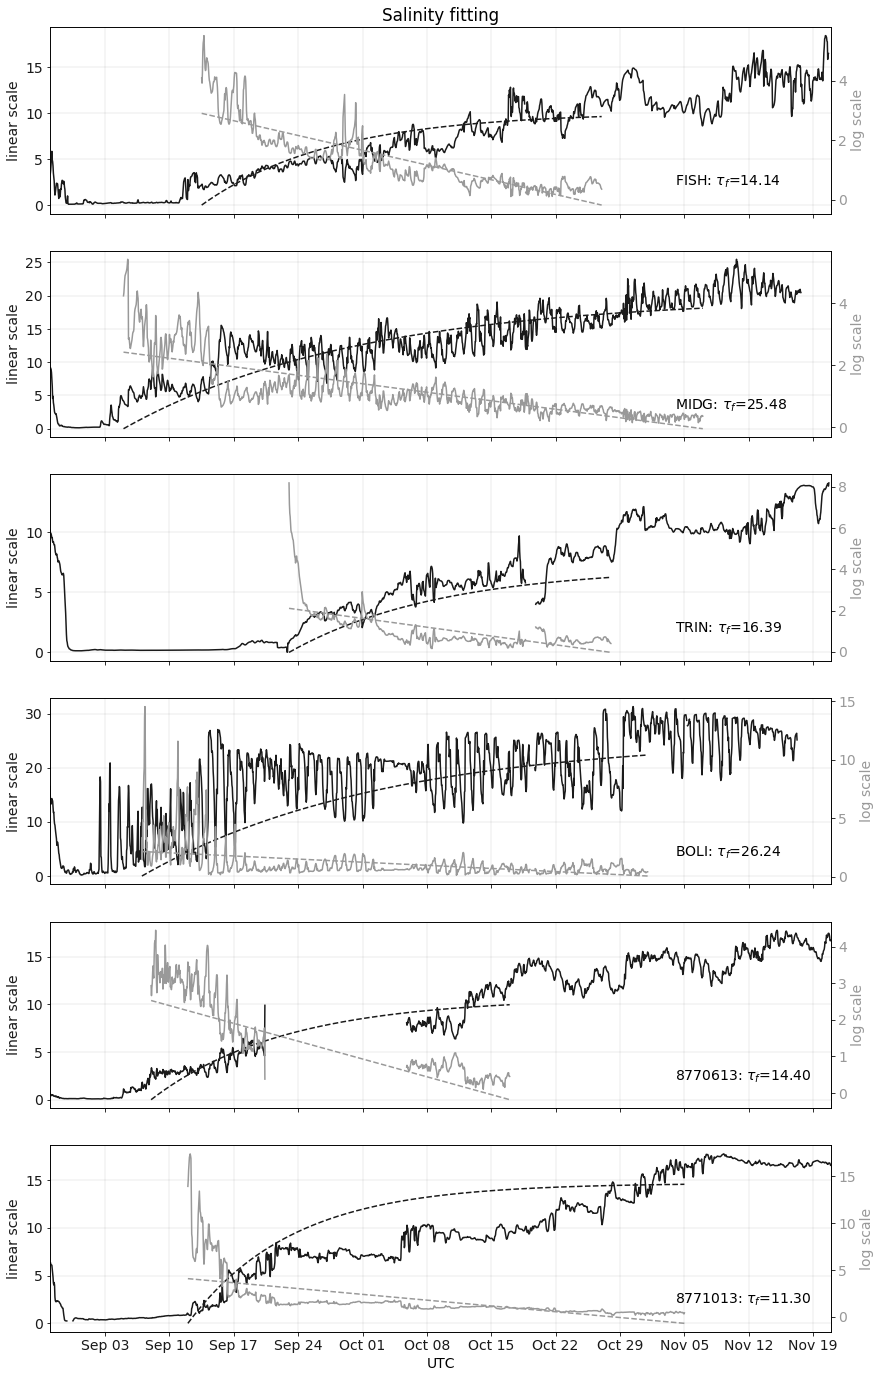

In [466]:
dst = '2017-8-28'; den = '2017-11-20'
fig, axes = plt.subplots(len(saltcols), 1, figsize=(14,24), sharex=True)

for col, ax in zip(saltcols, axes):
    
    name = col.split(':')[0]
    S0 = df[col]['2017-8-1':'2017-8-20'].mean()
    print(S0)
#     S0 = df[col]['2017-8-1':'2017-8-20'].mean()
    transform = (-1/np.log(abs(1-df[col]/S0)))
    
    for i, (start, stop) in enumerate(zip(times[name]['starts'], times[name]['stops'])):
        
        # get fit
        d1 = start; d2 = stop
        tnums = df['idx'][d1:d2] - df['idx'][d1]
        p = np.polyfit(tnums, transform[d1:d2].interpolate(), 1)
#         p = np.polyfit(tnums, df[col + ' (log)'][d1:d2].interpolate(), 1)
        tau = -1/p[0]
        
#         S0 = df[col][d1]
#         y = S0*np.exp(tnums/tau)
        y = S0*(1 - np.exp(-tnums/tau))


        # linear
        color = '0.1'
        if i == 0:
            ax.plot(df[dst:den].index, df[col][dst:den], color=color)  # plot data
        ax.plot(df[d1:d2].index, y, '--', color=color)  # plot fit
        ax.tick_params(labelcolor=color)
        ax.set_ylabel('linear scale', color=color)
#         ax.set_ylim(df[col][dst:den].min(), df[col][dst:den].max())

        # log
        color = '0.6'
        ax2 = ax.twinx()
        if i == 0:
            ax2.plot(df[d1:d2].index, transform[d1:d2], color=color)  # plot log data
        ax2.plot(df[d1:d2].index, np.polyval(p, tnums), label='log space line fit', color=color, ls='--')  # plot log fit
        ax2.tick_params(labelcolor=color)
        ax2.set_ylabel('log scale', color=color)
#         ax2.set_ylim(df[col + ' (log)'][dst:den].min(), df[col + ' (log)'][dst:den].max())

        # write station name and tau
        ax.text(0.8, 0.15 - i*0.1, name + r': $\tau_f$=%1.2f' % tau, transform=ax.transAxes)

        ax.grid(which='major', lw=1.5, color='k', alpha=0.05)
        ax.grid(which='minor', lw=1, color='k', alpha=0.05)
    
# hours = mpl.dates.HourLocator(byhour=np.arange(0,24,12))
# ax.xaxis.set_minor_locator(hours)
days = mpl.dates.DayLocator(interval=7)
ax.xaxis.set_major_locator(days)

ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))

axes[0].set_title('Salinity fitting')
axes[-1].set_xlabel('UTC')
axes[-1].autoscale(enable=True, axis='x', tight=True)


# df[[col for col in df.columns if 'log' in col]]['2017-8-24':'2017-9-3'].plot(figsize=(14,15), legend=True, subplots=True);

In [308]:
p

array([-0.07048236,  3.26154668])

14.1879476942


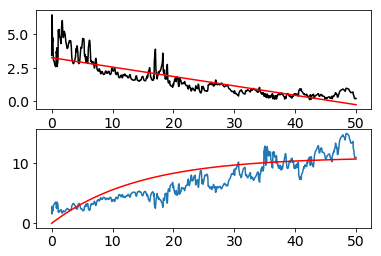

In [316]:
dst = '2017-9-12 00:00'; den = '2017-11-1 00:00'
tnums = df['idx'][dst:den] - df['idx'][dst]
transform = (-1/np.log(abs(1-df[saltcols[0]]/S0)))
p = np.polyfit(tnums, transform[dst:den].interpolate(), 1)

fig, axes = plt.subplots(2, 1)
axes[0].plot(tnums, transform[dst:den],'k', label='Salinity, ')
axes[0].plot(tnums, np.polyval(p, tnums), 'r', label='log space line fit')

tau = -1/p[0]
# S0 = df[saltcols[0]][dst]
# y = S0*np.exp(-tnums/tau)
y = S0*(1 - np.exp(-tnums/tau))

axes[1].plot(tnums, df[saltcols[0]][dst:den])
axes[1].plot(tnums, y, 'r')
print(tau)

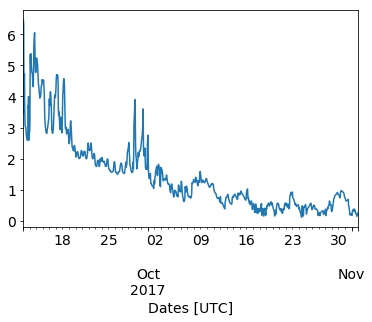

In [284]:
S0 = 11
dst = '2017-9-12'; den = '2017-11-1'
tnums = df['idx'][dst:dend] - df['idx'][dst]
# plt.plot(df[dst:den].index, -1/np.log(abs(1-df[saltcols[0]][dst:den]/S0)))
(-1/np.log(abs(1-df[saltcols[0]]/S0)))[dst:den].plot()

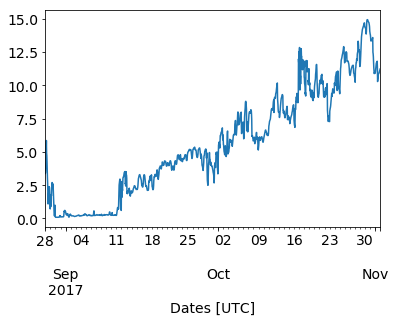

In [278]:
df[saltcols[0]][dst:den].plot()

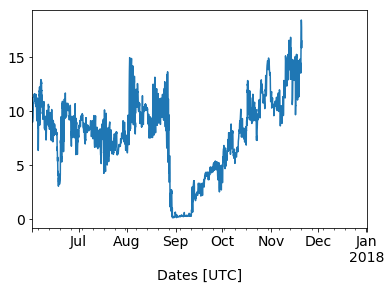

The sites down the ship channel have a short timescale (to 9/8), then a few weeks timescale. Trinity Bay and 8771013 are different.

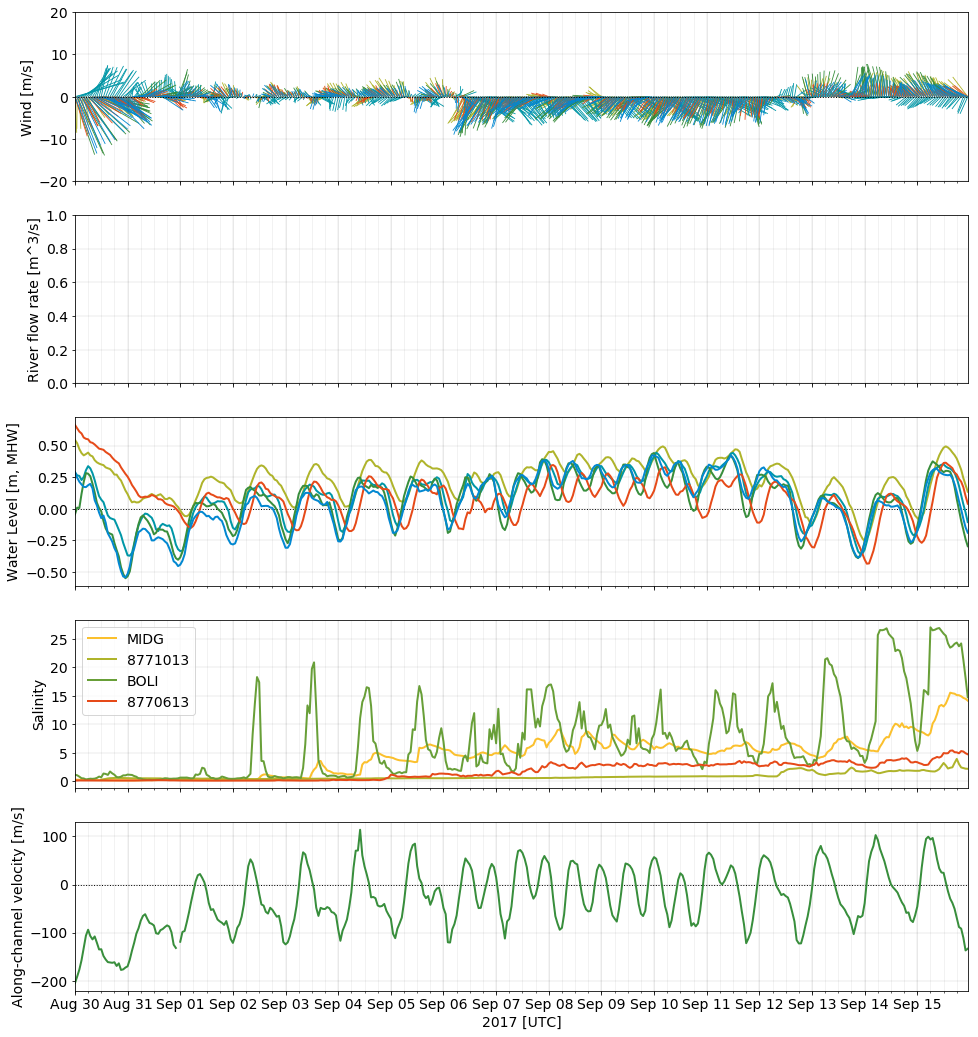

In [223]:
# define short dataframe to simplify plotting
dsp = '2017-08-30'; dep = '2017-9-15'
ddt = 1
dfsh = df.copy()[::ddt][dsp:dep]
dfsh['idx'] = date2num(pd.to_datetime(dfsh.index).to_pydatetime())
width = 0.2

fig, axes = plt.subplots(5, 1, figsize=(16,18), sharex=True)

for buoy in buoys_used:
    
    ## Wind ##
    if 'East [m/s]' in buoys[buoy]['vars'] and not dfsh[buoy + ': East [m/s]'].isnull().all():
        axes[0].quiver(dfsh['idx'], np.zeros(len(dfsh)), dfsh[buoy + ': East [m/s]'], dfsh[buoy + ': North [m/s]'], 
                       headaxislength=0, headlength=0, width=width, units='y', scale_units='y', scale=1, 
                       color=buoys[buoy]['color'], label=buoy)
    
    ## Trinity River ##
#     axes[1].plot(dfsh.index, dfsh['08067252: Trinity flow rate [m^3/s]'], color=buoys[buoy]['color'], lw=2)
    
    ## Sea Level ##
    if 'Water Level [m]' in buoys[buoy]['vars']:
        axes[2].plot(dfsh.index, dfsh[buoy + ': Water Level [m]'], label=buoy, color=buoys[buoy]['color'], lw=2)
        
    ## Salinity ##
    if 'Salinity' in buoys[buoy]['vars']:
        axes[3].plot(dfsh.index, dfsh[buoy + ': Salinity'], label=buoy, color=buoys[buoy]['color'], lw=2)
        axes[3].legend()
        
    ## Entrance along-channel velocity ##
    if 'Along [cm/s]' in buoys[buoy]['vars']:
#         axes[4].plot(dfsh.index, dfsh[buoy + ': Along [cm/s], depth 6.8 [m]'], label=buoy, color=buoys[buoy]['color'], lw=2)
        axes[4].plot(dfsh.index, dfsh[buoy + ': Along [cm/s], depth 5.79 [m]'], label=buoy, color=buoys[buoy]['color'], lw=2)
#         axes[4].plot(dfsh.index, dfsh[buoy + ': Along [cm/s], depth 7.8 [m]'], label=buoy, color=buoys[buoy]['color'], lw=2)

# labels
axes[0].set_ylabel('Wind [m/s]')
axes[1].set_ylabel('River flow rate [m^3/s]')
axes[2].set_ylabel('Water Level [m, MHW]')
axes[3].set_ylabel('Salinity')
axes[4].set_ylabel('Along-channel velocity [m/s]')

axes[0].set_ylim(-20,20)
axes[0].set_xlim(dfsh.index[0], dfsh.index[-1])
axes[0].hlines(0, dfsh.index[0], dfsh.index[-1], linewidth=1, linestyle=':')
axes[2].hlines(0, dfsh.index[0], dfsh.index[-1], linewidth=1, linestyle=':')
axes[4].hlines(0, dfsh.index[0], dfsh.index[-1], linewidth=1, linestyle=':')
for ax in axes:
    ax.grid(which='major', lw=1.5, color='k', alpha=0.05)
    ax.grid(which='minor', lw=1, color='k', alpha=0.05)

minor = mpl.dates.HourLocator(byhour=np.arange(0,24,6))
ax.xaxis.set_minor_locator(minor)
major = mpl.dates.HourLocator(byhour=np.arange(0,24,24))
ax.xaxis.set_major_locator(major)
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%b %d'))

handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
# ax.legend(by_label.values(), by_label.keys(), loc='upper right')   

ax.set_xlabel('2017 [UTC]')

# plt.savefig('figures/ssh.pdf', bbox_inches='tight')

In [233]:
# times = {'FISH': {'starts': ['2017-9-1 00:00'], 'stops': ['2017-11-5 00:00']},
#         'MIDG': {'starts': ['2017-9-1 00:00'], 'stops': ['2017-11-5 00:00']},
#         'TRIN': {'starts': ['2017-9-1 00:00'], 'stops': ['2017-11-5 00:00']},
#         'BOLI': {'starts': ['2017-9-1 00:00'], 'stops': ['2017-11-5 00:00']},
#         '8770613': {'starts': ['2017-9-1 00:00'], 'stops': ['2017-11-5 00:00']},
#         '8771013': {'starts': ['2017-9-1 00:00'], 'stops': ['2017-11-5 00:00']}}

# times = {'FISH': {'starts': ['2017-9-10 12:00'], 'stops': ['2017-10-27 00:00']},
#         'MIDG': {'starts': ['2017-9-2 00:00'], 'stops': ['2017-11-7 00:00']},
#         'TRIN': {'starts': ['2017-9-16 12:00'], 'stops': ['2017-10-28 00:00']},
#         'BOLI': {'starts': ['2017-9-1 00:00'], 'stops': ['2017-11-1 00:00']},
#         '8770613': {'starts': ['2017-9-5 00:00'], 'stops': ['2017-10-17 00:00']},
#         '8771013': {'starts': ['2017-9-12 00:00'], 'stops': ['2017-10-22 00:00']}}

times = {'FISH': {'starts': ['2017-9-12 12:00'], 'stops': ['2017-10-22 00:00']},
        'MIDG': {'starts': ['2017-9-2 00:00'], 'stops': ['2017-10-22 00:00']},
        'TRIN': {'starts': ['2017-9-16 12:00'], 'stops': ['2017-10-22 00:00']},
        'BOLI': {'starts': ['2017-9-1 00:00'], 'stops': ['2017-10-22 00:00']},
        '8770613': {'starts': ['2017-9-5 00:00'], 'stops': ['2017-10-22 00:00']},
        '8771013': {'starts': ['2017-9-12 00:00'], 'stops': ['2017-10-22 00:00']}}

# times = {'FISH': {'starts': ['2017-9-14 00:00', '2017-9-28 00:00'], 'stops': ['2017-9-27 00:00', '2017-10-16 00:00']},
#         'MIDG': {'starts': ['2017-8-31 00:00', '2017-9-7 00:00'], 'stops': ['2017-9-6 00:00', '2017-9-17 00:00']},
#         'TRIN': {'starts': ['2017-9-17 12:00'], 'stops': ['2017-10-6 00:00']},
#         'BOLI': {'starts': ['2017-8-31 16:00', '2017-9-9 00:00'], 'stops': ['2017-9-8 00:00','2017-9-22 00:00']},
#         '8770613': {'starts': ['2017-9-1 16:00', '2017-9-8 00:00'], 'stops': ['2017-9-8 00:00','2017-9-20 00:00']},
#         '8771013': {'starts': ['2017-9-8 00:00'], 'stops': ['2017-9-22 00:00']}}

15.1201468121 38.0598230914 13
14.6321387395 14.1913693051 3
8.94503958938 25.2325161359 17
21.2606663547 12.4525479298 2
14.2599821289 26.0358554843 6
9.67071336983 9.77825467899 13


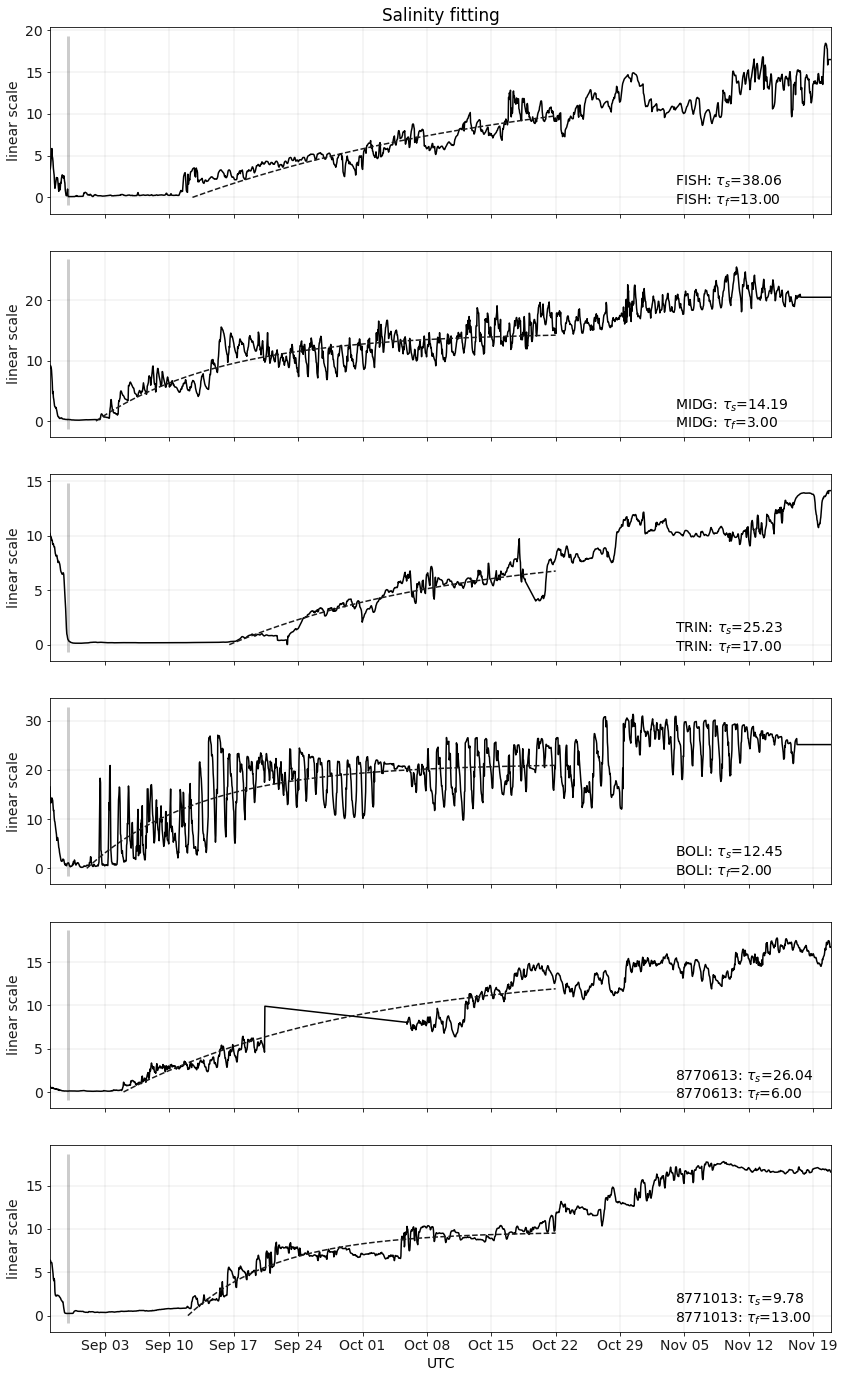

In [234]:
dst = '2017-8-28'; den = '2017-11-20'
fig, axes = plt.subplots(len(saltcols), 1, figsize=(14,24), sharex=True)

tau = []; Sinf = []; tauf = []
for col, ax in zip(saltcols, axes):
    
    name = col.split(':')[0]
#     Sinf = df[col]['2017-11-1':'2017-11-10'].mean()
#     Sinf = df[col]['2017-8-1':'2017-8-20'].mean()
    def recovery(t, Sinf, tau):
        '''exponential function.'''

        return Sinf*(1-np.exp(-t/tau))
    
    for i, (start, stop) in enumerate(zip(times[name]['starts'], times[name]['stops'])):
        
        # get fit
        d1 = start; d2 = stop
        tnums = df['idx'][d1:d2] - df['idx'][d1]
        fit = curve_fit(recovery, tnums, df[col][d1:d2].interpolate(), bounds=(0,90))
        data_fit = recovery(tnums, *fit[0])
        Sinf.append(fit[0][0])
        tau.append(fit[0][1])
        # how long fresh
        tauf.append((pd.Timestamp(d1) - pd.Timestamp('2017-8-30 00:00')).days)
        print(Sinf[-1],tau[-1], tauf[-1])
  
        # linear
        color = '0.1'
        if i == 0:
            ax.plot(df[col][dst:den].interpolate(), 'k')
        ax.plot(data_fit.index, data_fit, '--', color=color)  # plot fit
        ax.tick_params(labelcolor=color)
        ax.set_ylabel('linear scale', color=color)

        # write station name and tau
        ax.text(0.8, 0.15 - i*0.1, name + r': $\tau_s$=%1.2f' % tau[-1], transform=ax.transAxes)
        ax.text(0.8, 0.15 - 0.1, name + r': $\tau_f$=%1.2f' % tauf[-1], transform=ax.transAxes)

        ax.grid(which='major', lw=1.5, color='k', alpha=0.05)
        ax.grid(which='minor', lw=1, color='k', alpha=0.05)
        
        ylims = ax.get_ylim()
        ax.vlines('2017-8-30 00:00', *ylims, lw=3, alpha=0.2)
    
days = mpl.dates.DayLocator(interval=7)
ax.xaxis.set_major_locator(days)

ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))

axes[0].set_title('Salinity fitting')
axes[-1].set_xlabel('UTC')
axes[-1].autoscale(enable=True, axis='x', tight=True)

fig.savefig('figures/salinity_reintroduction.pdf', bbox_inches='tight')
fig.savefig('figures/salinity_reintroduction.png', bbox_inches='tight')

# Sinf after: 10, 20, 10, 26, 14, 16
# Sinf before: 10, 20, 7, 25, 11, 15
# Sinf optimized, end date variable: 20, 20, 13, 20, 10, 10
# Sinf optimized, end date 10/22: 19, 15, 9, 21, 14, 10
# Sinf optimized, end date 10/29: 23, 16, 14, 21, 14, 12
# Sinf optimized, end date 11/5: 22, 18, 24, 23, 17, 16
# Sinf optimized, end date 11/12: 18, 22, 22, 24, 17, 24
# tau end date variable: 63, 26, 41, 13, 15, 10
# tau end date 10/22: 56, 14, 25, 12, 26, 10
# tau end date 10/29: 70, 17, 46, 12, 26, 16
# tau, end date 11/5: 66, 24, 90, 15, 35, 29
# tau, end date 11/12: 51, 33, 79, 17, 34, 53
# df[[col for col in df.columns if 'log' in col]]['2017-8-24':'2017-9-3'].plot(figsize=(14,15), legend=True, subplots=True);

There are two important time scales here:

1. time before salinity reintroduction
1. timescale of salinity reintroduction

The overall timescale should be a combination of the two, something like:

$ \tau = \tau_{f} + \tau_{s} $ (fresh and salty)



$
\begin{align}
    &S(t) = S_\infty (1-e^{-t/\tau}) \\
    &S(0) = 0 \\
    &S(\tau) = 63\% S_{\infty} \\
    &S(3\tau) = 95\% S_{\infty} \\
    &S(5\tau) = 99\% S_{\infty}
\end{align}
$

Since $\tau_{reintro}$ gives the time to a certain percentage of reintroduction of salinity, we can have several effective timescales. For time to 63% salinity reintroduction, we have

$\tau = \tau_{f} + \tau_{s}$

For time to 95% salinity reintroduction, we have

$\tau = \tau_{f} + 3*\tau_{s}$


In [192]:
for col, taf, ta in zip(saltcols, tauf, tau):
    
    name = col.split(':')[0]
    state = 'Station %s time to .63 salinity is %2f2 days' % (name, taf+ta)
    print(state)
#     state = 'Station %s time to .95 salinity is %2f2 days' % (name, taf+3*ta)
#     print(state)


Station FISH time to .63 salinity is 66.5860622 days
Station MIDG time to .63 salinity is 17.1913692 days
Station TRIN time to .63 salinity is 42.2325162 days
Station BOLI time to .63 salinity is 14.4525482 days
Station 8770613 time to .63 salinity is 32.0358552 days
Station 8771013 time to .63 salinity is 22.7782552 days


### Map

Plot timescale with colored circles

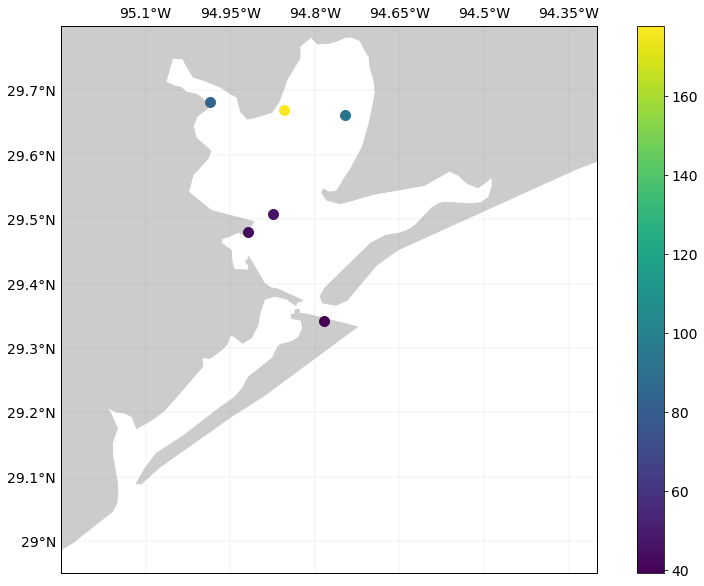

In [226]:
base = 'drive_data/'
d = np.load(base + 'bathy_galv_clean.npz')  # all of Galveston Bay
bathy = d['bathy']; dx = d['dx']; dy = d['dy']; lon = d['lon']; lat = d['lat']
bathyo = np.load(base + 'bathy_every_fifth.npz')['bathy'][::-1,:][1:-1,1:-1]  # all
bathyo = np.ma.masked_where(bathyo>0, bathyo)

fig = plt.figure(figsize=(12, 8))# (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
ax.set_extent([-95.25, -94.3, 28.95, 29.8], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
# ax.coastlines(resolution='10m')  # coastline resolution options are '110m', '50m', '10m'
ax.set_facecolor('0.8')
# ax.pcolormesh(lon, lat, bathyo.mask, cmap=cmo.gray_r, vmin=0, vmax=3, transform=pc)
# mappable = ax.pcolormesh(lon, lat, bathyo, cmap=cmo.gray, transform=pc)
# ax.contour(lon, lat, bathyo.mask, 1, colors='k', linewidths=1, transform=pc)

# plot buoys
# vmin = min(tauf+tau); vmax = max(tauf+tau)
vmin = min(tauf+3*np.asarray(tau)); vmax = max(tauf+3*np.asarray(tau))
for saltcol, ta, taf in zip(saltcols, tau, tauf):
    buoy = saltcol.split(':')[0]
    param = taf+3*ta
    mappable = ax.scatter(*buoys[buoy]['ll'], c=param, s=100, transform=pc, zorder=10, vmin=vmin, vmax=vmax)
plt.colorbar(mappable)

In [218]:
vmin

2

In [217]:
tauf+3*tau

[11,
 3,
 17,
 2,
 6,
 13,
 55.586062335276104,
 14.191369305080755,
 25.232516135900752,
 12.45254792975436,
 26.035855484271522,
 9.7782546789915905,
 55.586062335276104,
 14.191369305080755,
 25.232516135900752,
 12.45254792975436,
 26.035855484271522,
 9.7782546789915905,
 55.586062335276104,
 14.191369305080755,
 25.232516135900752,
 12.45254792975436,
 26.035855484271522,
 9.7782546789915905]

In [235]:
curve_fit?